# SFU CMPT413
# Term Project
# Group-Langlanucher
# Wei Yao, Nicholas Carr
# Generate Sentiment Polarity of Tweets Using LSTM with Word2Vec/GloVe

# 1. Preparation Work

# 1.1 Packages Installation

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import chi2
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import collections
import nltk
from nltk.corpus import stopwords
import sys
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer
import gensim
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools
#!/Users/mozzietian/miniconda3/bin/python -m pip install wordcloud
from wordcloud import WordCloud

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
print(sys.executable)

/Users/mozzietian/miniconda3/bin/python


# 1.2 Build  helper functions to filter data

In [11]:
# def helper fuctions to process extracted tweet file D2.txt 
# mainly focused on remove url + punctuation + stopwords+ other languages
# split into lits of words 
def remove_url_punctuation(x):
    #get rid of url, punctuations, hashtags
  
    url_pattern= re.compile(r'https?://\S+|www\.\S+')
    replace_url =url_pattern.sub(r'',str(x))
    punctuation = re.compile(r'[^\w\s]')
    without_punctuation = punctuation.sub(r'',replace_url).lower()
    return without_punctuation
    
def split(x):
    #generate pieces of tokens from the entire text
    
    split_word_list = x.split(" ")
    return split_word_list

def remove_stopwords(x):
    #remove stop words
    global stop_words
    
    without_stopwords = []
    for word in x:
        if word not in stop_words and len(word)>2 and word != 'nan':
            without_stopwords.append(word)
    return without_stopwords

def detect_lang(x):
    #extract english tweet only
    
    from langdetect import detect
    try:
        lang = detect(x)
        return(lang)
    except:
        return("other")
    
def decode_sentiment(label):
    return decode_map[int(label)]

# pre-defined words

TRAIN_SIZE = 0.8
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"


SENTIMENT_THRESHOLDS = (0.4, 0.7)

# EXPORT
KERAS_MODEL = "model.h5"
WORD2VEC_MODEL = "model.w2v"
TOKENIZER_MODEL = "tokenizer.pkl"
ENCODER_MODEL = "encoder.pkl"

# 2. Data

# 2.1 Load data with Numpy

In [9]:

df = pd.read_csv("df.csv", encoding = "ISO-8859-1", names=["target", "ids", "date", "flag", "user", "text"])

In [10]:
print("Size - the # of tweets:", len(df))

Size - the # of tweets: 1600000


In [52]:
df.head(10)

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [12]:
df['text'] = df['text'].apply(remove_url_punctuation)

In [13]:
df.head(10)

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,switchfoot awww thats a bummer you shoulda ...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he cant update his facebook by t...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,kenichan i dived many times for the ball manag...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass no its not behaving at all im ...
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,loltrish hey long time no see yes rains a bit...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,tatiana_k nope they didnt have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,twittera que me muera


# 2.2 Decode target 
#Map target attribute from [0, 2, 4] into ["NEGATIVE","POSITIVE"] 

In [24]:
decode_map = {0: "NEGATIVE", 4: "POSITIVE"}
df['target'].replace(decode_map, inplace=True)

In [25]:

#df.target = df.target.apply(lambda x: decode_sentiment(x))

In [26]:
df.head(10)

,target,ids,date,flag,user,text
0,NEGATIVE,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,switchfoot awww thats a bummer you shoulda ...
1,NEGATIVE,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he cant update his facebook by t...
2,NEGATIVE,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,kenichan i dived many times for the ball manag...
3,NEGATIVE,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,NEGATIVE,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass no its not behaving at all im ...
5,NEGATIVE,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,kwesidei not the whole crew
6,NEGATIVE,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,need a hug
7,NEGATIVE,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,loltrish hey long time no see yes rains a bit...
8,NEGATIVE,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,tatiana_k nope they didnt have it
9,NEGATIVE,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,twittera que me muera


# 2.3 Overview of data distribution

Labels: ['NEGATIVE', 'POSITIVE']
Amounts: [800000, 800000]


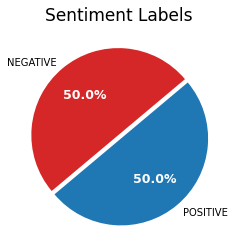

In [27]:
target_cnt = Counter(df.target)
my_targets = list(target_cnt.keys())
my_targets_amount = list(target_cnt.values())
print("Labels:",my_targets )
print("Amounts:",my_targets_amount)
my_targets1=my_targets[0]
my_targets2=my_targets[1]

sizes1 = [2, 2]
explode1 = (0, 0.05)
labels = ('NEGATIVE', 'POSITIVE')

fig1, ax1 = plt.subplots()
_, _, autopcts = ax1.pie(sizes1,explode= explode1, labels=labels, autopct='%1.1f%%',
        shadow=False,startangle=40, colors=('tab:red', 'tab:blue'))

plt.setp(autopcts, **{'color':'white', 'weight':'bold', 'fontsize':12.5})
ax1.set_title('Sentiment Labels', fontdict={'fontsize': 17})

plt.show()


# 2.4 Pre-Process Dataset

In [14]:
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

In [15]:
def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [28]:
%%time
df.text = df.text.apply(lambda x: remove_url_punctuation(x))

CPU times: user 5.34 s, sys: 189 ms, total: 5.53 s
Wall time: 5.53 s


# 3 Experiment with Word2Vec and GloVe

# 3.1 Word2Vec Embedding

## 3.1.1 Build W2V

In [31]:
# Tokenize text 
documents = [_text.split() for _text in df_train.text] 
# Split data
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
# Initialize w2v_model
w2v_model = gensim.models.word2vec.Word2Vec(size=300, 
                                            window=7, 
                                            min_count=10, 
                                            workers=8)

In [32]:
# build vovcab of the model
w2v_model.build_vocab(documents)

2020-12-07 23:02:14,171 : INFO : collecting all words and their counts
2020-12-07 23:02:14,172 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-12-07 23:02:14,197 : INFO : PROGRESS: at sentence #10000, processed 130310 words, keeping 19709 word types
2020-12-07 23:02:14,228 : INFO : PROGRESS: at sentence #20000, processed 259980 words, keeping 32625 word types
2020-12-07 23:02:14,261 : INFO : PROGRESS: at sentence #30000, processed 388297 words, keeping 43758 word types
2020-12-07 23:02:14,297 : INFO : PROGRESS: at sentence #40000, processed 519178 words, keeping 53977 word types
2020-12-07 23:02:14,330 : INFO : PROGRESS: at sentence #50000, processed 648299 words, keeping 63740 word types
2020-12-07 23:02:14,363 : INFO : PROGRESS: at sentence #60000, processed 777453 words, keeping 73097 word types
2020-12-07 23:02:14,399 : INFO : PROGRESS: at sentence #70000, processed 906617 words, keeping 81934 word types
2020-12-07 23:02:14,436 : INFO : PROGRESS: at 

2020-12-07 23:02:16,655 : INFO : PROGRESS: at sentence #710000, processed 9230248 words, keeping 445791 word types
2020-12-07 23:02:16,690 : INFO : PROGRESS: at sentence #720000, processed 9360058 words, keeping 450206 word types
2020-12-07 23:02:16,726 : INFO : PROGRESS: at sentence #730000, processed 9489788 words, keeping 454651 word types
2020-12-07 23:02:16,761 : INFO : PROGRESS: at sentence #740000, processed 9619268 words, keeping 458961 word types
2020-12-07 23:02:16,797 : INFO : PROGRESS: at sentence #750000, processed 9749071 words, keeping 463335 word types
2020-12-07 23:02:16,835 : INFO : PROGRESS: at sentence #760000, processed 9878686 words, keeping 467750 word types
2020-12-07 23:02:16,874 : INFO : PROGRESS: at sentence #770000, processed 10009019 words, keeping 472202 word types
2020-12-07 23:02:16,912 : INFO : PROGRESS: at sentence #780000, processed 10137015 words, keeping 476500 word types
2020-12-07 23:02:16,949 : INFO : PROGRESS: at sentence #790000, processed 1026

In [34]:
# Train w2v_model
w2v_model.train(documents, total_examples=len(documents), epochs=32)

2020-12-07 23:07:00,715 : INFO : training model with 8 workers on 38161 vocabulary and 300 features, using sg=0 hs=0 sample=0.001 negative=5 window=7
2020-12-07 23:07:01,737 : INFO : EPOCH 1 - PROGRESS: at 9.39% examples, 1136091 words/s, in_qsize 14, out_qsize 1
2020-12-07 23:07:02,770 : INFO : EPOCH 1 - PROGRESS: at 19.54% examples, 1167986 words/s, in_qsize 15, out_qsize 2
2020-12-07 23:07:03,773 : INFO : EPOCH 1 - PROGRESS: at 29.81% examples, 1195537 words/s, in_qsize 15, out_qsize 0
2020-12-07 23:07:04,783 : INFO : EPOCH 1 - PROGRESS: at 39.83% examples, 1199988 words/s, in_qsize 13, out_qsize 2
2020-12-07 23:07:05,791 : INFO : EPOCH 1 - PROGRESS: at 49.97% examples, 1205880 words/s, in_qsize 15, out_qsize 0
2020-12-07 23:07:06,792 : INFO : EPOCH 1 - PROGRESS: at 59.93% examples, 1207806 words/s, in_qsize 15, out_qsize 0
2020-12-07 23:07:07,807 : INFO : EPOCH 1 - PROGRESS: at 70.03% examples, 1208747 words/s, in_qsize 13, out_qsize 2
2020-12-07 23:07:08,807 : INFO : EPOCH 1 - PRO

2020-12-07 23:07:45,098 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-12-07 23:07:45,098 : INFO : EPOCH - 4 : training on 16625290 raw words (12207967 effective words) took 11.8s, 1037837 effective words/s
2020-12-07 23:07:46,117 : INFO : EPOCH 5 - PROGRESS: at 9.75% examples, 1182867 words/s, in_qsize 13, out_qsize 2
2020-12-07 23:07:47,118 : INFO : EPOCH 5 - PROGRESS: at 19.84% examples, 1206696 words/s, in_qsize 14, out_qsize 1
2020-12-07 23:07:48,122 : INFO : EPOCH 5 - PROGRESS: at 29.81% examples, 1208615 words/s, in_qsize 15, out_qsize 0
2020-12-07 23:07:49,127 : INFO : EPOCH 5 - PROGRESS: at 39.83% examples, 1211472 words/s, in_qsize 16, out_qsize 1
2020-12-07 23:07:50,134 : INFO : EPOCH 5 - PROGRESS: at 49.91% examples, 1213857 words/s, in_qsize 12, out_qsize 3
2020-12-07 23:07:51,148 : INFO : EPOCH 5 - PROGRESS: at 60.05% examples, 1215662 words/s, in_qsize 15, out_qsize 0
2020-12-07 23:07:52,164 : INFO : EPOCH 5 - PROGRESS: at 70.27% examples, 121731

2020-12-07 23:08:27,963 : INFO : EPOCH - 8 : training on 16625290 raw words (12208305 effective words) took 10.5s, 1164886 effective words/s
2020-12-07 23:08:28,977 : INFO : EPOCH 9 - PROGRESS: at 9.51% examples, 1157932 words/s, in_qsize 13, out_qsize 2
2020-12-07 23:08:29,983 : INFO : EPOCH 9 - PROGRESS: at 18.28% examples, 1110891 words/s, in_qsize 15, out_qsize 0
2020-12-07 23:08:30,988 : INFO : EPOCH 9 - PROGRESS: at 27.95% examples, 1132606 words/s, in_qsize 14, out_qsize 1
2020-12-07 23:08:32,003 : INFO : EPOCH 9 - PROGRESS: at 37.07% examples, 1124187 words/s, in_qsize 15, out_qsize 0
2020-12-07 23:08:33,005 : INFO : EPOCH 9 - PROGRESS: at 46.44% examples, 1127876 words/s, in_qsize 14, out_qsize 1
2020-12-07 23:08:34,019 : INFO : EPOCH 9 - PROGRESS: at 56.08% examples, 1134037 words/s, in_qsize 13, out_qsize 2
2020-12-07 23:08:35,019 : INFO : EPOCH 9 - PROGRESS: at 65.83% examples, 1141718 words/s, in_qsize 15, out_qsize 0
2020-12-07 23:08:36,048 : INFO : EPOCH 9 - PROGRESS: at

2020-12-07 23:09:11,171 : INFO : EPOCH - 12 : training on 16625290 raw words (12205719 effective words) took 10.8s, 1134635 effective words/s
2020-12-07 23:09:12,186 : INFO : EPOCH 13 - PROGRESS: at 9.87% examples, 1200382 words/s, in_qsize 14, out_qsize 1
2020-12-07 23:09:13,187 : INFO : EPOCH 13 - PROGRESS: at 19.48% examples, 1186340 words/s, in_qsize 12, out_qsize 3
2020-12-07 23:09:14,190 : INFO : EPOCH 13 - PROGRESS: at 28.85% examples, 1171080 words/s, in_qsize 13, out_qsize 2
2020-12-07 23:09:15,191 : INFO : EPOCH 13 - PROGRESS: at 38.45% examples, 1171584 words/s, in_qsize 13, out_qsize 2
2020-12-07 23:09:16,192 : INFO : EPOCH 13 - PROGRESS: at 48.41% examples, 1180903 words/s, in_qsize 14, out_qsize 1
2020-12-07 23:09:17,210 : INFO : EPOCH 13 - PROGRESS: at 58.49% examples, 1186051 words/s, in_qsize 12, out_qsize 3
2020-12-07 23:09:18,224 : INFO : EPOCH 13 - PROGRESS: at 68.59% examples, 1190276 words/s, in_qsize 13, out_qsize 2
2020-12-07 23:09:19,250 : INFO : EPOCH 13 - PRO

2020-12-07 23:09:54,056 : INFO : EPOCH - 16 : training on 16625290 raw words (12207161 effective words) took 10.3s, 1187319 effective words/s
2020-12-07 23:09:55,069 : INFO : EPOCH 17 - PROGRESS: at 9.57% examples, 1165627 words/s, in_qsize 14, out_qsize 1
2020-12-07 23:09:56,071 : INFO : EPOCH 17 - PROGRESS: at 19.06% examples, 1161142 words/s, in_qsize 14, out_qsize 1
2020-12-07 23:09:57,072 : INFO : EPOCH 17 - PROGRESS: at 28.91% examples, 1175193 words/s, in_qsize 14, out_qsize 1
2020-12-07 23:09:58,075 : INFO : EPOCH 17 - PROGRESS: at 38.63% examples, 1177712 words/s, in_qsize 14, out_qsize 1
2020-12-07 23:09:59,081 : INFO : EPOCH 17 - PROGRESS: at 48.41% examples, 1179922 words/s, in_qsize 15, out_qsize 0
2020-12-07 23:10:00,094 : INFO : EPOCH 17 - PROGRESS: at 58.26% examples, 1181254 words/s, in_qsize 13, out_qsize 2
2020-12-07 23:10:01,111 : INFO : EPOCH 17 - PROGRESS: at 68.17% examples, 1182556 words/s, in_qsize 15, out_qsize 0
2020-12-07 23:10:02,127 : INFO : EPOCH 17 - PRO

2020-12-07 23:10:39,364 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-12-07 23:10:39,365 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-12-07 23:10:39,368 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-12-07 23:10:39,379 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-12-07 23:10:39,380 : INFO : EPOCH - 20 : training on 16625290 raw words (12207923 effective words) took 13.4s, 908416 effective words/s
2020-12-07 23:10:40,394 : INFO : EPOCH 21 - PROGRESS: at 6.93% examples, 841559 words/s, in_qsize 15, out_qsize 0
2020-12-07 23:10:41,394 : INFO : EPOCH 21 - PROGRESS: at 13.91% examples, 846141 words/s, in_qsize 13, out_qsize 2
2020-12-07 23:10:42,398 : INFO : EPOCH 21 - PROGRESS: at 21.89% examples, 888094 words/s, in_qsize 16, out_qsize 1
2020-12-07 23:10:43,407 : INFO : EPOCH 21 - PROGRESS: at 30.53% examples, 928091 words/s, in_qsize 14, out_qsize 1
2020-12-07 23:10:44,414 : INFO : EPO

2020-12-07 23:11:24,275 : INFO : worker thread finished; awaiting finish of 4 more threads
2020-12-07 23:11:24,276 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-12-07 23:11:24,278 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-12-07 23:11:24,288 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-12-07 23:11:24,288 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-12-07 23:11:24,289 : INFO : EPOCH - 24 : training on 16625290 raw words (12207597 effective words) took 10.0s, 1217252 effective words/s
2020-12-07 23:11:25,310 : INFO : EPOCH 25 - PROGRESS: at 9.33% examples, 1136688 words/s, in_qsize 15, out_qsize 0
2020-12-07 23:11:26,325 : INFO : EPOCH 25 - PROGRESS: at 18.88% examples, 1142483 words/s, in_qsize 13, out_qsize 2
2020-12-07 23:11:27,329 : INFO : EPOCH 25 - PROGRESS: at 27.47% examples, 1110477 words/s, in_qsize 15, out_qsize 0
2020-12-07 23:11:28,344 : INFO : EPOCH 25 - PROGRESS: at

2020-12-07 23:12:10,578 : INFO : EPOCH 28 - PROGRESS: at 79.31% examples, 871417 words/s, in_qsize 13, out_qsize 2
2020-12-07 23:12:11,587 : INFO : EPOCH 28 - PROGRESS: at 86.77% examples, 873890 words/s, in_qsize 12, out_qsize 3
2020-12-07 23:12:12,592 : INFO : EPOCH 28 - PROGRESS: at 94.24% examples, 876212 words/s, in_qsize 14, out_qsize 1
2020-12-07 23:12:13,322 : INFO : worker thread finished; awaiting finish of 7 more threads
2020-12-07 23:12:13,352 : INFO : worker thread finished; awaiting finish of 6 more threads
2020-12-07 23:12:13,355 : INFO : worker thread finished; awaiting finish of 5 more threads
2020-12-07 23:12:13,357 : INFO : worker thread finished; awaiting finish of 4 more threads
2020-12-07 23:12:13,362 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-12-07 23:12:13,370 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-12-07 23:12:13,376 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-12-07 23:12:1

2020-12-07 23:12:54,194 : INFO : EPOCH 32 - PROGRESS: at 49.74% examples, 1200979 words/s, in_qsize 13, out_qsize 2
2020-12-07 23:12:55,194 : INFO : EPOCH 32 - PROGRESS: at 59.81% examples, 1206165 words/s, in_qsize 14, out_qsize 1
2020-12-07 23:12:56,212 : INFO : EPOCH 32 - PROGRESS: at 69.68% examples, 1202735 words/s, in_qsize 14, out_qsize 1
2020-12-07 23:12:57,214 : INFO : EPOCH 32 - PROGRESS: at 79.61% examples, 1203359 words/s, in_qsize 14, out_qsize 1
2020-12-07 23:12:58,221 : INFO : EPOCH 32 - PROGRESS: at 89.72% examples, 1205664 words/s, in_qsize 15, out_qsize 0
2020-12-07 23:12:59,189 : INFO : worker thread finished; awaiting finish of 7 more threads
2020-12-07 23:12:59,209 : INFO : worker thread finished; awaiting finish of 6 more threads
2020-12-07 23:12:59,211 : INFO : worker thread finished; awaiting finish of 5 more threads
2020-12-07 23:12:59,212 : INFO : worker thread finished; awaiting finish of 4 more threads
2020-12-07 23:12:59,213 : INFO : worker thread finished;

CPU times: user 24min 56s, sys: 10.3 s, total: 25min 7s
Wall time: 5min 58s


(390661125, 532009280)

### Get data ready for training

In [40]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train.text)
vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)
x_train = pad_sequences(tokenizer.texts_to_sequences(df_train.text), maxlen=300)
x_test = pad_sequences(tokenizer.texts_to_sequences(df_test.text), maxlen=300)

### Label Encoder 

In [45]:
labels = df_train.target.unique().tolist()
#labels.append(NEUTRAL)
labels

['POSITIVE', 'NEGATIVE']

In [46]:
encoder = LabelEncoder()
encoder.fit(df_train.target.tolist())

y_train = encoder.transform(df_train.target.tolist())
y_test = encoder.transform(df_test.target.tolist())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)


y_train (1280000, 1)
y_test (320000, 1)


# 3.1.2 Build The Embedding layer Matrix

In [49]:
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in tokenizer.word_index.items():
  if word in w2v_model.wv:
    embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

(654743, 300)


In [50]:
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=300, trainable=False)

# 3.1.3 Compose the Sequential LSTM Model with W2V

In [51]:
model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.5))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 300)          196422900 
_________________________________________________________________
dropout (Dropout)            (None, 300, 300)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 196,583,401
Trainable params: 160,501
Non-trainable params: 196,422,900
_________________________________________________________________


# 3.1.4 Compile + Train  the model

## Compile

In [52]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

## Train

In [54]:
# Callbacks
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]

%%time
history = model.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=8,
                    validation_split=0.1,
                    verbose=1,
                    callbacks=callbacks)

Epoch 1/8
1125/1125 [==============================] - ETA: 0s - loss: 0.4938 - accuracy: 0.7609WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


2020-12-08 01:28:57,473 : WARNING : Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


1125/1125 [==============================] - 4756s 4s/step - loss: 0.4938 - accuracy: 0.7609 - val_loss: 0.4374 - val_accuracy: 0.8013
Epoch 2/8
1125/1125 [==============================] - ETA: 0s - loss: 0.4582 - accuracy: 0.7846WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


2020-12-08 02:55:56,794 : WARNING : Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


1125/1125 [==============================] - 5214s 5s/step - loss: 0.4582 - accuracy: 0.7846 - val_loss: 0.4234 - val_accuracy: 0.8081
Epoch 3/8
1125/1125 [==============================] - ETA: 0s - loss: 0.4483 - accuracy: 0.7899 WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


2020-12-08 07:59:35,856 : WARNING : Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


1125/1125 [==============================] - 18213s 16s/step - loss: 0.4483 - accuracy: 0.7899 - val_loss: 0.4183 - val_accuracy: 0.8110
Epoch 4/8
1125/1125 [==============================] - ETA: 0s - loss: 0.4426 - accuracy: 0.7934WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


2020-12-08 09:17:08,453 : WARNING : Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


1125/1125 [==============================] - 4649s 4s/step - loss: 0.4426 - accuracy: 0.7934 - val_loss: 0.4152 - val_accuracy: 0.8134
Epoch 5/8
1125/1125 [==============================] - ETA: 0s - loss: 0.4377 - accuracy: 0.7960WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


2020-12-08 11:15:23,984 : WARNING : Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


1125/1125 [==============================] - 7091s 6s/step - loss: 0.4377 - accuracy: 0.7960 - val_loss: 0.4092 - val_accuracy: 0.8154
Epoch 6/8
1125/1125 [==============================] - ETA: 0s - loss: 0.4345 - accuracy: 0.7980WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


2020-12-08 12:42:19,434 : WARNING : Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


1125/1125 [==============================] - 5208s 5s/step - loss: 0.4345 - accuracy: 0.7980 - val_loss: 0.4080 - val_accuracy: 0.8161
Epoch 7/8
1125/1125 [==============================] - ETA: 0s - loss: 0.4312 - accuracy: 0.7997WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


2020-12-08 14:00:49,319 : WARNING : Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


1125/1125 [==============================] - 4706s 4s/step - loss: 0.4312 - accuracy: 0.7997 - val_loss: 0.4046 - val_accuracy: 0.8171
Epoch 8/8
1125/1125 [==============================] - ETA: 0s - loss: 0.4282 - accuracy: 0.8010WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


2020-12-08 15:19:28,024 : WARNING : Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


1125/1125 [==============================] - 4714s 4s/step - loss: 0.4282 - accuracy: 0.8010 - val_loss: 0.4029 - val_accuracy: 0.8181
CPU times: user 2d 2h 58min 26s, sys: 21h 5min 58s, total: 3d 4min 25s
Wall time: 15h 9min 55s


# 3.1.5 Evaluate the model with Word2Vec

## Accuracy and Loss

In [55]:
score = model.evaluate(x_test, y_test, batch_size=1024)
print("ACCURACY:",score[1])
print("LOSS:",score[0])

313/313 [==============================] - 301s 962ms/step - loss: 0.4029 - accuracy: 0.8174
ACCURACY: 0.817368745803833
LOSS: 0.4029090106487274


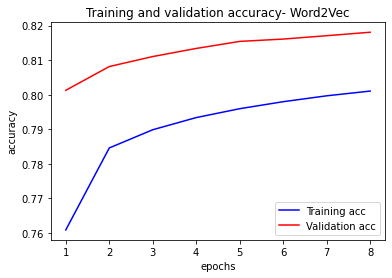

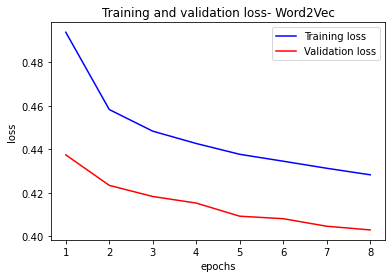

In [83]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy- Word2Vec')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss- Word2Vec')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
 
plt.show()

### looks like this model is doing well , no overfitting, although the accuracy is not very high
### and the running speed is really slow.

# 3.1.6 Application -  Prediction 

In [70]:
# decoder 
def decode_sentiment(score):
            
    label = NEUTRAL
    if score <= SENTIMENT_THRESHOLDS[0]:
        label = NEGATIVE
    elif score >= SENTIMENT_THRESHOLDS[1]:
        label = POSITIVE

    return label


In [71]:
# predictor 
def predict(text):
    start_at = time.time()
    x_test = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=SEQUENCE_LENGTH)
    score = model.predict([x_test])[0]
    label = decode_sentiment(score)
    return {"label": label, "score": float(score),
       "elapsed_time": time.time()-start_at}  

## Try some texts 

In [72]:
predict("NLP is so interesting that I am getting obsessed")

{'label': 'POSITIVE',
 'score': 0.9262499809265137,
 'elapsed_time': 0.2972400188446045}

In [73]:
predict("I hate the winter")

{'label': 'NEGATIVE',
 'score': 0.013658285140991211,
 'elapsed_time': 0.07059192657470703}

In [76]:
predict("I don't like you")
# wrong here !

{'label': 'POSITIVE',
 'score': 0.9021734595298767,
 'elapsed_time': 0.07148313522338867}

# 3.2 Experiment with Glove

##  included in next.ipynb

# 4 Analysis

### 4.1Confusion Matrix

In [78]:
%%time
y_pred_1d = []
y_test_1d = list(df_test.target)
scores = model.predict(x_test, verbose=1, batch_size=8000)
y_pred_1d = [decode_sentiment(score) for score in scores]

40/40 [==============================] - 262s 7s/step
CPU times: user 21min 44s, sys: 6min 26s, total: 28min 10s
Wall time: 4min 30s


In [79]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

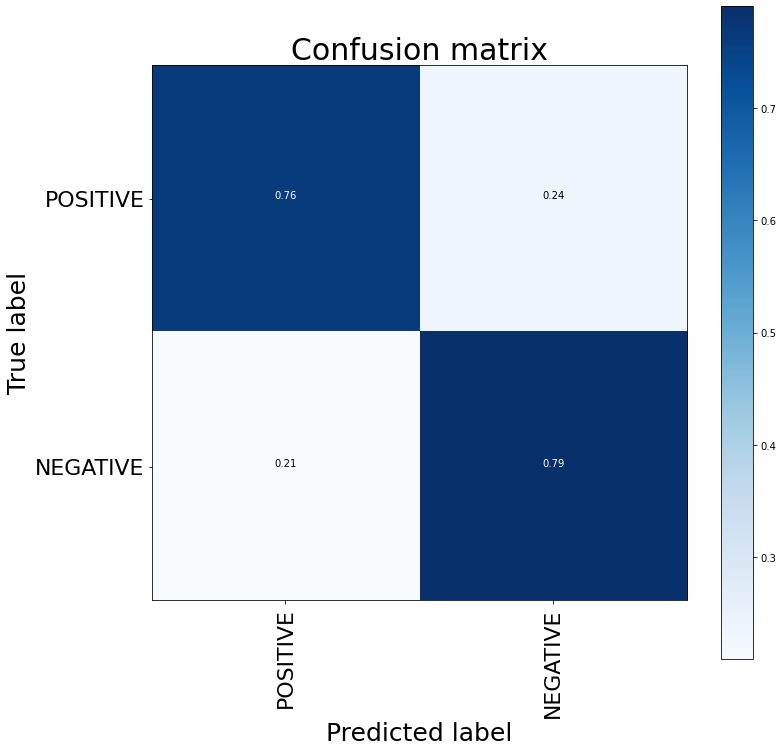

CPU times: user 937 ms, sys: 85.6 ms, total: 1.02 s
Wall time: 1.09 s


In [45]:
%%time

cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
plt.figure(figsize=(12,12))
plot_confusion_matrix(cnf_matrix, classes=df_train.target.unique(), title="Confusion matrix")
plt.show()

## 4.2 Classification Report

In [80]:
print(classification_report(y_test_1d, y_pred_1d))

/Users/mozzietian/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    NEGATIVE       0.84      0.77      0.80    159494
     NEUTRAL       0.00      0.00      0.00         0
    POSITIVE       0.89      0.69      0.77    160506

    accuracy                           0.73    320000
   macro avg       0.58      0.49      0.53    320000
weighted avg       0.86      0.73      0.79    320000



### Save model

In [82]:
model.save(KERAS_MODEL)
w2v_model.save(WORD2VEC_MODEL)
pickle.dump(tokenizer, open(TOKENIZER_MODEL, "wb"), protocol=0)
pickle.dump(encoder, open(ENCODER_MODEL, "wb"), protocol=0)

2020-12-08 19:33:50,133 : INFO : saving Word2Vec object under model.w2v, separately None
2020-12-08 19:33:50,143 : INFO : storing np array 'vectors' to model.w2v.wv.vectors.npy
2020-12-08 19:33:50,490 : INFO : not storing attribute vectors_norm
2020-12-08 19:33:50,492 : INFO : storing np array 'syn1neg' to model.w2v.trainables.syn1neg.npy
2020-12-08 19:33:50,837 : INFO : not storing attribute cum_table
2020-12-08 19:33:51,723 : INFO : saved model.w2v


## 4.3 Possible Cause

## Generate 20 most similar word of "good" from w2v_model and plot as wordcloud

In [37]:

cloud_data = w2v_model.wv.most_similar("good",topn=20,)

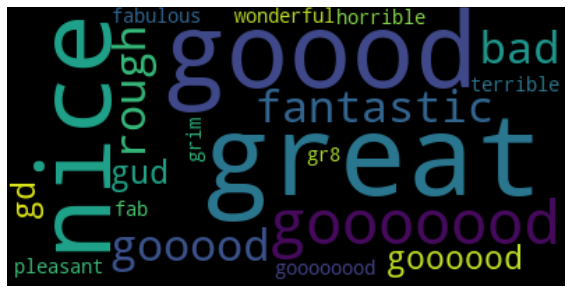

In [38]:
word_list=[]
for ele in cloud_data:
    for i in range(int(ele[1]*128)):
        word_list.append(ele[0])
        
    

    
#word_list   
nltk_count = nltk.FreqDist(word_list)

wordcloud = WordCloud().generate_from_frequencies(nltk_count)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation  ='bilinear')
plt.axis('off')
plt.show()

## As we can see, words such as 'rough','terrible','horrible'... are all listed inside most similar words of 'good'.
## Which is spotted by us as the main issue cause Word2Vec to fail in its confused matrix.